In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a lis
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

albany au
wasilla us
ushuaia ar
esperance au
hermanus za
busselton au
ushuaia ar
yellowknife ca
brae gb
mahebourg mu
airai pw
punta arenas cl
rikitea pf
abnub eg
pangnirtung ca
busselton au
ahipara nz
illoqqortoormiut gl
koumac nc
busselton au
mizdah ly
pisco pe
atuona pf
mataura pf
estevan ca
grand river south east mu
saskylakh ru
namibe ao
nuuk gl
albany au
khatanga ru
thompson ca
jamestown sh
hobart au
victoria sc
sorland no
barrow us
umm jarr sd
buala sb
coquimbo cl
tura ru
pevek ru
mar del plata ar
mayo ca
bismil tr
maykain kz
grand river south east mu
taolanaro mg
thompson ca
saldanha za
sumenep id
warqla dz
saint-denis re
kaitangata nz
bredasdorp za
aksarka ru
busselton au
vaini to
illoqqortoormiut gl
butaritari ki
butaritari ki
bajil ye
barentsburg sj
hilo us
attawapiskat ca
jamestown sh
mataura pf
cape town za
carnarvon au
diebougou bf
grimshaw ca
matamoros mx
namatanai pg
little current ca
rikitea pf
zhob pk
tamiahua mx
busselton au
kangaatsiaq gl
busselton au
rikitea pf
san 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
import requests
requests.__version__


'2.25.1'

In [8]:
# Import the requests library.
import requests
requests.__version__

'2.25.1'

In [9]:
# Import the API key.
from config import weather_api_key


In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url +weather_api_key + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
----------

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,59.63,82,2,2.28,US,2021-09-25 01:42:01
1,Wasilla,61.5814,-149.4394,38.03,92,90,0.00,US,2021-09-25 01:45:09
2,Ushuaia,-54.8000,-68.3000,38.86,87,75,0.00,AR,2021-09-25 01:41:59
3,Esperance,-33.8667,121.9000,55.24,53,46,14.36,AU,2021-09-25 01:45:10
4,Hermanus,-34.4187,19.2345,53.91,83,100,3.02,ZA,2021-09-25 01:43:29
5,Busselton,-33.6500,115.3333,59.04,58,3,17.27,AU,2021-09-25 01:43:24
6,Yellowknife,62.4560,-114.3525,46.92,90,75,16.11,CA,2021-09-25 01:43:40
7,Brae,60.3964,-1.3530,51.71,77,98,7.87,GB,2021-09-25 01:45:12
8,Mahebourg,-20.4081,57.7000,71.26,94,75,3.44,MU,2021-09-25 01:42:11
9,Airai,-8.9266,125.4092,77.65,36,25,2.53,TL,2021-09-25 01:42:41


In [21]:
# Reordering the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
# assign the same DataFrame with new column order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-09-25 01:42:01,42.6001,-73.9662,59.63,82,2,2.28
1,Wasilla,US,2021-09-25 01:45:09,61.5814,-149.4394,38.03,92,90,0.00
2,Ushuaia,AR,2021-09-25 01:41:59,-54.8000,-68.3000,38.86,87,75,0.00
3,Esperance,AU,2021-09-25 01:45:10,-33.8667,121.9000,55.24,53,46,14.36
4,Hermanus,ZA,2021-09-25 01:43:29,-34.4187,19.2345,53.91,83,100,3.02
5,Busselton,AU,2021-09-25 01:43:24,-33.6500,115.3333,59.04,58,3,17.27
6,Yellowknife,CA,2021-09-25 01:43:40,62.4560,-114.3525,46.92,90,75,16.11
7,Brae,GB,2021-09-25 01:45:12,60.3964,-1.3530,51.71,77,98,7.87
8,Mahebourg,MU,2021-09-25 01:42:11,-20.4081,57.7000,71.26,94,75,3.44
9,Airai,TL,2021-09-25 01:42:41,-8.9266,125.4092,77.65,36,25,2.53


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

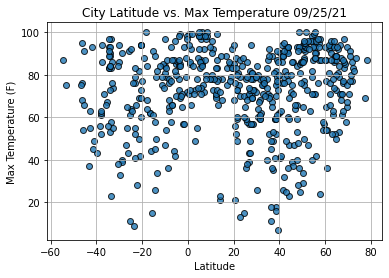

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()